In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")

In [49]:
red.columns = red.columns.str.replace(" ", "_")
white.columns = white.columns.str.replace(" ", "_")

red['type'] = 0
white['type'] = 1

combined = pd.concat([red, white], ignore_index=True)
combined.info()

dfml = combined.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [50]:
rs_outlier = dfml['residual_sugar'].idxmax()
dfml_rs_outlier_removed = dfml.drop(index=dfml['residual_sugar'].idxmax())

In [51]:
print(dfml['total_sulfur_dioxide'].astype(float).skew())
print(dfml['total_sulfur_dioxide'].astype(float).kurt())

-0.0011774782344379131
-0.3716636548571346


In [52]:
from sklearn.model_selection import train_test_split

# split data into X and Y
X = dfml_rs_outlier_removed.drop(['quality', 'type'], axis=1)
y = dfml_rs_outlier_removed['type']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train.head()

In [53]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=700)

# fit model
LR_model.fit(X_train_norm, y_train)

LogisticRegression(max_iter=700, random_state=42)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
preds = LR_model.predict(X_test_norm)

acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print("accuracy: ", acc)
# print(classification_report(y_test, preds))
print("confusion_matrix: \n", cm)

# original: 0.98
# rs outlier removed: 0.9815384615384616
# normalized: 0.9830769230769231
# rs outlier removed + normalized: 0.9861538461538462

accuracy:  0.9861538461538462
confusion_matrix: 
 [[326  15]
 [  3 956]]


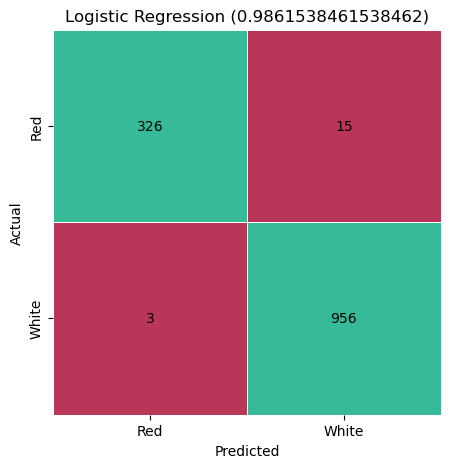

In [56]:
plt.figure(figsize=(5,5))

cm_df = pd.DataFrame(cm, index=["Red","White"], columns=["Red","White"])

cmap = sns.color_palette(["#BA3658", "#36BA98", "#BA3658", "#36BA98"])
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5, linecolor='white', annot_kws={"color": "black"})

plt.title('Logistic Regression (' + str(acc) + ')')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [63]:
# split data into X and Y
X = dfml.drop(['quality', 'type'], axis=1)
y = dfml['type']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train.head()

In [58]:
# Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
RF_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [59]:
# predictions
preds = RF_clf.predict(X_test)
acc = accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
print("accuracy: ", acc)
print("confusion_matrix: \n", cm)

# normalizing makes literally no difference
# 0.9961538461538462
# rs outlier removed: 0.9953846153846154

accuracy:  0.9961538461538462
confusion_matrix: 
 [[337   4]
 [  1 958]]


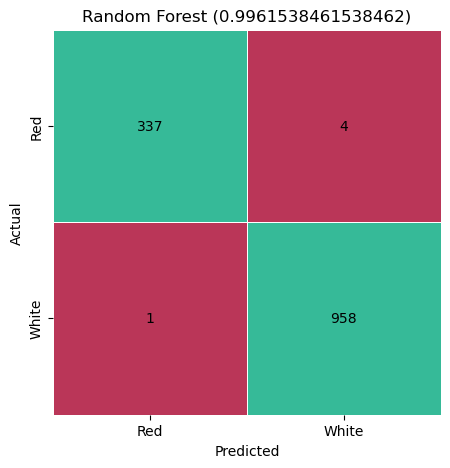

In [61]:
plt.figure(figsize=(5,5))

cm_df = pd.DataFrame(cm, index=["Red","White"], columns=["Red","White"])

cmap = sns.color_palette(["#BA3658", "#36BA98", "#BA3658", "#36BA98"])
sns.heatmap(cm_df, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=.5, linecolor='white', annot_kws={"color": "black"})

plt.title('Random Forest (' + str(acc) + ')')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()